# Soccer Prophet: Modeling

Now that we've cleaned, explored and wrangled our data, we are ready to move on to the modelling portion. The three models that we will be using are Logistic Regression, SVM, and XGBoost.

Let's import the libraries that we will be using:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now let's import our dataset

In [2]:
#importing data
modeling_data = pd.read_csv("Euro_Football_For_Modelling.csv")

In [3]:
modeling_data.head()

,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,...,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain,HomeTeamForm,AwayTeamForm
0,1.0,3.0,A,1.0,1.0,D,16.0,9.0,4.0,4.0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,1.0,0.0,H,1.0,0.0,H,26.0,10.0,11.0,4.0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,2.0,2.0,D,0.0,0.0,D,8.0,19.0,2.0,6.0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,0.0,1.0,A,0.0,0.0,D,20.0,5.0,3.0,1.0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,1.0,4.0,A,0.0,2.0,A,17.0,15.0,6.0,7.0,...,0,0,0,1,0,0,0,0,0.0,0.0


In [4]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

modeling_data.head()

,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Year,Month,Day,HomeTeam_Ajaccio,HomeTeam_Ajaccio GFCO,HomeTeam_Alaves,HomeTeam_Almeria,HomeTeam_Amiens,HomeTeam_Angers,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Atalanta,HomeTeam_Ath Bilbao,HomeTeam_Ath Madrid,HomeTeam_Augsburg,HomeTeam_Barcelona,HomeTeam_Bastia,HomeTeam_Bayern Munich,HomeTeam_Benevento,HomeTeam_Betis,HomeTeam_Bielefeld,HomeTeam_Bochum,HomeTeam_Bologna,HomeTeam_Bordeaux,HomeTeam_Bournemouth,HomeTeam_Braunschweig,HomeTeam_Brentford,HomeTeam_Brescia,HomeTeam_Brest,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cadiz,HomeTeam_Caen,HomeTeam_Cagliari,HomeTeam_Cardiff,HomeTeam_Carpi,HomeTeam_Catania,HomeTeam_Celta,HomeTeam_Cesena,HomeTeam_Chelsea,HomeTeam_Chievo,HomeTeam_Clermont,HomeTeam_Cordoba,HomeTeam_Crotone,HomeTeam_Crystal Palace,HomeTeam_Darmstadt,HomeTeam_Dijon,HomeTeam_Dortmund,HomeTeam_Eibar,HomeTeam_Ein Frankfurt,HomeTeam_Elche,HomeTeam_Empoli,HomeTeam_Espanol,HomeTeam_Everton,HomeTeam_Evian Thonon Gaillard,HomeTeam_FC Koln,HomeTeam_Fiorentina,HomeTeam_Fortuna Dusseldorf,HomeTeam_Freiburg,HomeTeam_Frosinone,HomeTeam_Fulham,HomeTeam_Genoa,HomeTeam_Getafe,HomeTeam_Girona,HomeTeam_Granada,HomeTeam_Greuther Furth,HomeTeam_Guingamp,HomeTeam_Hamburg,HomeTeam_Hannover,HomeTeam_Hertha,HomeTeam_Hoffenheim,HomeTeam_Huddersfield,HomeTeam_Huesca,HomeTeam_Hull,HomeTeam_Ingolstadt,HomeTeam_Inter,HomeTeam_Juventus,HomeTeam_La Coruna,HomeTeam_Las Palmas,HomeTeam_Lazio,HomeTeam_Lecce,HomeTeam_Leeds,HomeTeam_Leganes,HomeTeam_Leicester,HomeTeam_Lens,HomeTeam_Levante,HomeTeam_Leverkusen,HomeTeam_Lille,HomeTeam_Liverpool,HomeTeam_Livorno,HomeTeam_Lorient,HomeTeam_Lyon,HomeTeam_M'gladbach,HomeTeam_Mainz,HomeTeam_Malaga,HomeTeam_Mallorca,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Marseille,HomeTeam_Metz,HomeTeam_Middlesbrough,HomeTeam_Milan,HomeTeam_Monaco,HomeTeam_Montpellier,HomeTeam_Nancy,HomeTeam_Nantes,HomeTeam_Napoli,HomeTeam_Newcastle,HomeTeam_Nice,HomeTeam_Nimes,HomeTeam_Norwich,HomeTeam_Nurnberg,HomeTeam_Osasuna,HomeTeam_Paderborn,HomeTeam_Palermo,HomeTeam_Paris SG,HomeTeam_Parma,HomeTeam_Pescara,HomeTeam_QPR,HomeTeam_RB Leipzig,HomeTeam_Real Madrid,HomeTeam_Reims,HomeTeam_Rennes,HomeTeam_Roma,HomeTeam_Salernitana,HomeTeam_Sampdoria,HomeTeam_Sassuolo,HomeTeam_Schalke 04,HomeTeam_Sevilla,HomeTeam_Sheffield United,HomeTeam_Sochaux,HomeTeam_Sociedad,HomeTeam_Southampton,HomeTeam_Sp Gijon,HomeTeam_Spal,HomeTeam_Spezia,HomeTeam_St Etienne,HomeTeam_Stoke,HomeTeam_Strasbourg,HomeTeam_Stuttgart,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Torino,HomeTeam_Tottenham,HomeTeam_Toulouse,HomeTeam_Troyes,HomeTeam_Udinese,HomeTeam_Union Berlin,HomeTeam_Valencia,HomeTeam_Valenciennes,HomeTeam_Valladolid,HomeTeam_Vallecano,HomeTeam_Venezia,HomeTeam_Verona,HomeTeam_Villarreal,HomeTeam_Watford,HomeTeam_Werder Bremen,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wolfsburg,HomeTeam_Wolves,AwayTeam_Ajaccio,AwayTeam_Ajaccio GFCO,AwayTeam_Alaves,AwayTeam_Almeria,AwayTeam_Amiens,AwayTeam_Angers,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Atalanta,AwayTeam_Ath Bilbao,AwayTeam_Ath Madrid,AwayTeam_Augsburg,AwayTeam_Barcelona,AwayTeam_Bastia,AwayTeam_Bayern Munich,AwayTeam_Benevento,AwayTeam_Betis,AwayTeam_Bielefeld,AwayTeam_Bochum,AwayTeam_Bologna,AwayTeam_Bordeaux,AwayTeam_Bournemouth,AwayTeam_Braunschweig,AwayTeam_Brentford,AwayTeam_Brescia,AwayTeam_Brest,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Cadiz,AwayTeam_Caen,AwayTeam_Cagliari,AwayTeam_Cardiff,AwayTeam_Carpi,AwayTeam_Catania,AwayTeam_Celta,AwayTeam_Cesena,AwayTeam_Chelsea,AwayTeam_Chievo,AwayTeam_Clermont,AwayTeam_Cordoba,AwayTeam_Crotone,AwayTeam_Crystal Palace,AwayTeam_Darmstadt,AwayTeam_Dijon,AwayTeam_Dortmund,AwayTeam_Eibar,AwayTeam_Ein Frankfurt,AwayTeam_Elche,AwayTeam_Empoli,AwayTeam_Espanol,AwayTeam_Everton,AwayTeam_Evian Thonon Gaillar

Let's check the covariance for our Logistic Regression. Since we have 350 categories, we will exclude the dummy variables of our teams since we will be using those to predict the matches, and run an analysis on our other columns.

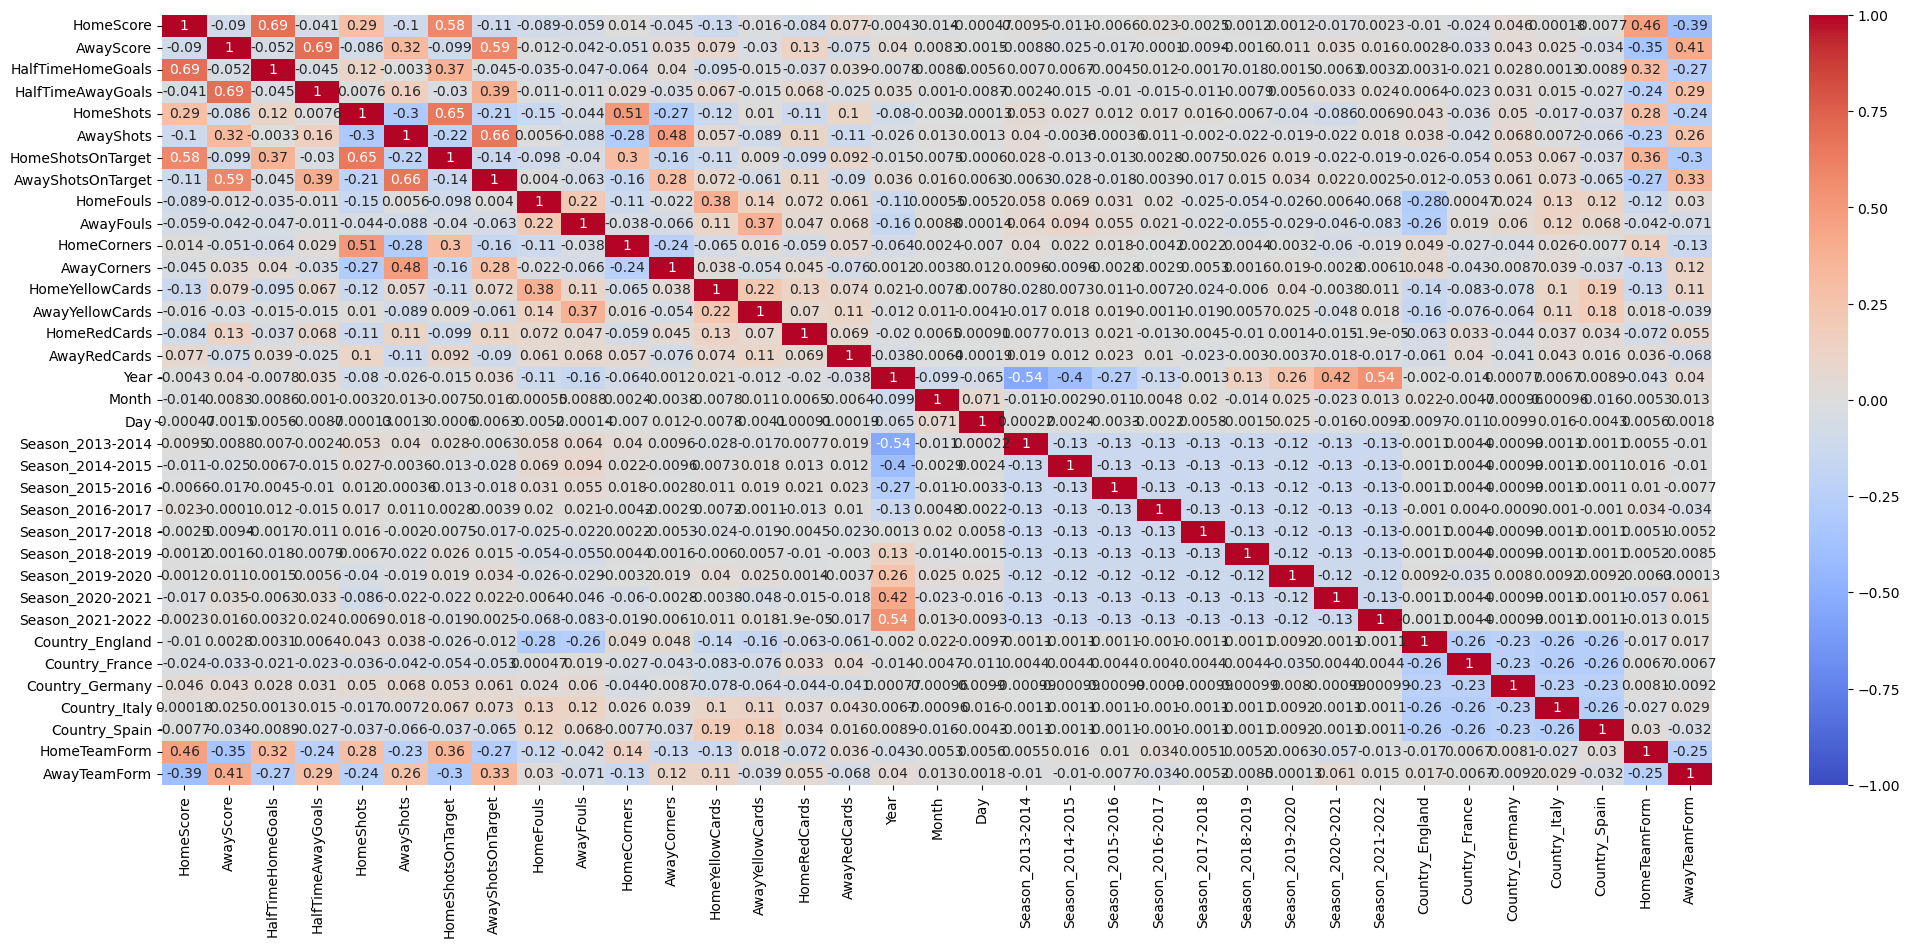

In [5]:
#grouping columns
covariance_columns = ['HomeScore', 'AwayScore', 'HalfTimeHomeGoals', "HalfTimeAwayGoals", 
                      "HomeShots", "AwayShots", "HomeShotsOnTarget", "AwayShotsOnTarget", "HomeFouls", "AwayFouls", 
                      "HomeCorners", "AwayCorners", "HomeYellowCards", "AwayYellowCards", "HomeRedCards", "AwayRedCards", 
                      "Year", "Month", "Day", "Season_2013-2014", "Season_2014-2015", "Season_2015-2016", "Season_2016-2017", 
                      "Season_2017-2018", "Season_2018-2019", "Season_2019-2020", "Season_2020-2021", "Season_2021-2022",
                     "Country_England", "Country_France", "Country_Germany", "Country_Italy", "Country_Spain", "HomeTeamForm", "AwayTeamForm"
                      ]
#covariance dataframe
covariance_data = modeling_data[covariance_columns]

plt.subplots(figsize=(25, 10))
sns.heatmap(covariance_data.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1) 
plt.show()

We see some high positive and negative correlations between `HomeScore`, `AwayScore`, `HalfTimeHomeGoals`, and `HalfTimeAwayGoals`. `HomeScore` is predictive of `HalfTimeHomeScores` because they both represent the amount of goals scored at 2 points in the match. Unsurprisingly the Home portion is negatively correlated with the Away portion of both goal categories, and vice versa. Since these columns are highly predictive of our target variable, we won't be using them in our modelling.

## Setting the Target Variables and Splitting the Data

Now let's set our target variable, which is `Result`. It is a multi-class classification with the possible outcomes being "Home Win", "Away Win", and "Draw. As a reminder, here is the distribution of the variable. 

In [6]:
#distribution of Result
modeling_data["Result"].value_counts()/ len(modeling_data) * 100

H    44.611805
A    30.467793
D    24.920402
Name: Result, dtype: float64

The home team wins 44% of the time, with the away team winning 30% and 25% of matches resulting in Draws. This shows that home advantage is present in this dataset. 

Now, let's split our target to the y variable and our features to X. We will drop the highly correlated columns mentioned above.

In [7]:
X = modeling_data.drop(['Result', 'HalfTimeResult', "HalfTimeHomeGoals", "HalfTimeAwayGoals", 'HomeScore', 'AwayScore'], axis=1) # Select features except target variable
y = modeling_data['Result'] # Target variable

Now, let's do a train/test split. We will first split the data into Test and Remainder, with the Test set being 30% of the data, and then split the remainder in to train and validation, with validation being 30% of the remainder. We will also stratify our first split to y to preserve the porportion of our target variable. This is important because it can ensure that our train and test sets are representative of the overall target variable, which can help to preserve the overall distribution and improve accuracy of our model.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into test and remainder sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.3, random_state=42)

print(f'Shape of remainder set: {X_remainder.shape}')
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of train set: {X_train.shape}')
print(f'Shape of validation set: {X_val.shape}')

Shape of remainder set: (11432, 347)
Shape of test set: (4900, 347)
Shape of train set: (8002, 347)
Shape of validation set: (3430, 347)


## Logistic Regression

For our first model, let's apply a logistic regression.

In [9]:
C = 10.**np.arange(-3,3)

train_acc=[]
test_acc=[]

for c in C:
    
    print(f'Now running the Logistic regression model with c={c}', end='\r')
    
    # Instantiate the Logistic Model 
    LR_model= LogisticRegression(C=c)
    LR_model.fit(X_train, y_train)
    
    # score on train and test
    train_accuracy = LR_model.score(X_train, y_train)
    test_accuracy = LR_model.score(X_test, y_test)
    
    #appending train and test scores
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

NameError: name 'LogisticRegression' is not defined

Now that our data is clean and wrangled with our new features, we start modelling. The models that we will be using are Logistic Regression, SVM, and XGBoost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = clean_data.drop(['Result', 'HalfTimeResult', "HalfTimeHomeGoals", "HalfTimeAwayGoals", 'HomeScore', 'AwayScore', "Date", "HomeTeam", "AwayTeam"], axis=1) # Select features except target variable
y = clean_data['Result'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89, stratify=y)
X_val, X_remainder, y_val, y_remainder = train_test_split(X_test, y_test, test_size=0.3, random_state=89)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

score = logreg.score(X_val, y_val)
print("Accuracy on validation set: {:.2f}%".format(score * 100))

y_pred_remainder = logreg.predict(X_remainder)

score_remainder = logreg.score(X_remainder, y_remainder)
print("Accuracy on remainder set: {:.2f}%".format(score_remainder * 100))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#setting up and displaying confusion matrix
cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_val, y_pred))

first split remainder and test
remainder into train and validation

fit on train, score on validation

gridsearch on remainder